# Pair Nulos
## Ejercicios gestión de nulos

En este pair programming usaremos el csv que generamos en el pair programming de ayer. El objetivo del ejercicio es identificar las columnas que contienen valores nulos y aplicar un proceso de imputación para manejarlos de manera adecuada.

In [86]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
# pd.set_option('display.max_rows', None) # para poder visualizar todas las columnas de los DataFrames

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [87]:
df = pd.read_csv('World_data_full_apply.csv', index_col = 0)
df.head(3)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa


In [88]:
df_copia = df.copy() # Copiamos nuestro dataframe original.
df_copia_seguridad = df.copy()

In [89]:
# Cambiamos los nombres de algunas columnas
nuevo_nombre = {'capital/major_city':'capital_major_city','currency-code': 'currency_code', 'co2-emissions':'co2_emissions'}
df.rename(columns=nuevo_nombre, inplace=True)
df.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital_major_city',
       'co2_emissions', 'cpi', 'cpi_change', 'currency_code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

Identificación de Valores Nulos.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               195 non-null    object 
 1   density                               195 non-null    float64
 2   abbreviation                          188 non-null    object 
 3   agricultural_land                     188 non-null    float64
 4   land_area                             165 non-null    float64
 5   armed_forces_size                     166 non-null    float64
 6   birth_rate                            189 non-null    float64
 7   calling_code                          194 non-null    float64
 8   capital_major_city                    192 non-null    object 
 9   co2_emissions                         183 non-null    float64
 10  cpi                                   175 non-null    float64
 11  cpi_change              

In [91]:
# Estudiamos las columnas del df que tienen valores nulos

df.isnull().sum()[df.isnull().sum()>0]

abbreviation                              7
agricultural_land                         7
land_area                                30
armed_forces_size                        29
birth_rate                                6
calling_code                              1
capital_major_city                        3
co2_emissions                            12
cpi                                      20
cpi_change                               16
currency_code                            15
fertility_rate                            7
forested_area                             7
gasoline_price                           20
gdp                                       2
gross_primary_education_enrollment        7
gross_tertiary_education_enrollment      12
infant_mortality                          6
largest_city                              6
life_expectancy                           8
maternal_mortality_ratio                 14
minimum_wage                             45
official_language               

In [92]:
# El df solo las columnas numéricas sería:

df_cols_numericas = df.select_dtypes(include=np.number) 
df_cols_numericas.shape

(195, 29)

In [93]:
# ¿En qué columnas numéricas hay nulos?
df_cols_numericas.isnull().sum()[df_cols_numericas.isnull().sum()>0]

columnas_numericas_nulos = (df_cols_numericas.isnull().sum()[df_cols_numericas.isnull().sum()>0]).index.tolist()

columnas_numericas_nulos

['agricultural_land',
 'land_area',
 'armed_forces_size',
 'birth_rate',
 'calling_code',
 'co2_emissions',
 'cpi',
 'cpi_change',
 'fertility_rate',
 'forested_area',
 'gasoline_price',
 'gdp',
 'gross_primary_education_enrollment',
 'gross_tertiary_education_enrollment',
 'infant_mortality',
 'life_expectancy',
 'maternal_mortality_ratio',
 'minimum_wage',
 'out_of_pocket_health_expenditure',
 'physicians_per_thousand',
 'population',
 'population_labor_force_participation',
 'tax_revenue',
 'total_tax_rate',
 'unemployment_rate',
 'urban_population',
 'latitude',
 'longitude']

In [94]:
df_columnas_categoricas = df.select_dtypes(include='object')

# ¿En qué columnas categóricas hay nulos?

df_columnas_categoricas.isnull().sum()[df_columnas_categoricas.isnull().sum()>0]

abbreviation           7
capital_major_city     3
currency_code         15
largest_city           6
official_language      5
continent              1
dtype: int64

In [95]:
columnas_categoricas_nulos = (df_columnas_categoricas.isnull().sum()[df_columnas_categoricas.isnull().sum()>0]).index.tolist()

Comenzamos la gestión de los nulos de las columnas categóricas.

In [96]:
# Estudiamos la proporción de nulos

for col in columnas_categoricas_nulos:
    print("-------------------------")
    print(f"Analizando la columna {col.upper()}: {col}")
    total_nulos = df[col].isnull().sum()
    print(f"Proporción de nulos: {total_nulos} nulos de un total de {df.shape[0]} columnas: {round(100*total_nulos/df.shape[0], 2)}%\n ")
    display((df[col].value_counts()/df.shape[0]).sort_values(ascending=False))

-------------------------
Analizando la columna ABBREVIATION: abbreviation
Proporción de nulos: 7 nulos de un total de 195 columnas: 3.59%
 


abbreviation
AF    0.005128
AZ    0.005128
BA    0.005128
DZ    0.005128
AD    0.005128
        ...   
UZ    0.005128
VU    0.005128
VE    0.005128
VN    0.005128
ZW    0.005128
Name: count, Length: 188, dtype: float64

-------------------------
Analizando la columna CAPITAL_MAJOR_CITY: capital_major_city
Proporción de nulos: 3 nulos de un total de 195 columnas: 1.54%
 


capital_major_city
Kabul               0.005128
Tirana              0.005128
Nassau, Bahamas     0.005128
Algiers             0.005128
Andorra la Vella    0.005128
                      ...   
Port Vila           0.005128
Caracas             0.005128
Hanoi               0.005128
Sanaa               0.005128
Harare              0.005128
Name: count, Length: 192, dtype: float64

-------------------------
Analizando la columna CURRENCY_CODE: currency_code
Proporción de nulos: 15 nulos de un total de 195 columnas: 7.69%
 


currency_code
EUR    0.117949
XOF    0.041026
XCD    0.030769
USD    0.030769
XAF    0.025641
         ...   
VED    0.005128
VND    0.005128
YER    0.005128
SLL    0.005128
ZMW    0.005128
Name: count, Length: 133, dtype: float64

-------------------------
Analizando la columna LARGEST_CITY: largest_city
Proporción de nulos: 6 nulos de un total de 195 columnas: 3.08%
 


largest_city
S����               0.010256
Baku                0.005128
Tuzla Canton        0.005128
Algiers             0.005128
Andorra la Vella    0.005128
                      ...   
Tashkent            0.005128
Port Vila           0.005128
Caracas             0.005128
Ho Chi Minh City    0.005128
Harare              0.005128
Name: count, Length: 188, dtype: float64

-------------------------
Analizando la columna OFFICIAL_LANGUAGE: official_language
Proporción de nulos: 5 nulos de un total de 195 columnas: 2.56%
 


official_language
English               0.158974
French                0.128205
Spanish               0.097436
Arabic                0.092308
Portuguese            0.035897
                        ...   
Slovene language      0.005128
Malaysian language    0.005128
Serbian               0.005128
Samoan                0.005128
Shona                 0.005128
Name: count, Length: 76, dtype: float64

-------------------------
Analizando la columna CONTINENT: continent
Proporción de nulos: 1 nulos de un total de 195 columnas: 0.51%
 


continent
Africa             0.271795
Europe             0.241026
Asia               0.230769
Central America    0.102564
Oceania            0.071795
South America      0.066667
North America      0.010256
Name: count, dtype: float64

No hay una gran cantidad de nulos (<10%).

Como no hemos encontrado ninguna categoría dominante dentro de ninguna columna, imputaremos creando una nueva categoría con valor desconocido: 'unknown'

In [97]:
df_copia = df.copy()

In [98]:
print(f"Total de nulos en columnas categóricas: {(df_columnas_categoricas.isnull().sum()[df_columnas_categoricas.isnull().sum()>0]).sum()}")

Total de nulos en columnas categóricas: 37


In [99]:
lista_columnas_imputar_con_unknown = ['abbreviation', 'capital_major_city', 'currency_code', 'largest_city', 'official_language','continent']


for col in lista_columnas_imputar_con_unknown:
    df[col] = df[col].fillna('unknown')

print(f"Total de nulos en columnas categóricas: {df[lista_columnas_imputar_con_unknown].isnull().sum().sum()}")



Total de nulos en columnas categóricas: 0


Ahora imputamos los valores faltantes de las columnas numéricas. 

In [100]:
for col in columnas_numericas_nulos:
    print("---------------------")
    print(f"Analizando {col.upper()}: {col}")
    total_nulos = df[col].isnull().sum() 
    print(f"Proporción de nulos: {np.round(100*total_nulos/df.shape[0])}%\n")
    display(df[col].value_counts().sort_values(ascending=False)/df.shape[0])

---------------------
Analizando AGRICULTURAL_LAND: agricultural_land
Proporción de nulos: 4.0%



agricultural_land
17.4    0.015385
33.3    0.010256
39.3    0.010256
32.4    0.010256
26.3    0.010256
          ...   
62.9    0.005128
15.3    0.005128
24.5    0.005128
32.1    0.005128
41.9    0.005128
Name: count, Length: 168, dtype: float64

---------------------
Analizando LAND_AREA: land_area
Proporción de nulos: 15.0%



land_area
652.230    0.005128
65.300     0.005128
468.000    0.005128
443.000    0.005128
29.743     0.005128
             ...   
12.189     0.005128
912.050    0.005128
331.210    0.005128
527.968    0.005128
390.757    0.005128
Name: count, Length: 165, dtype: float64

---------------------
Analizando ARMED_FORCES_SIZE: armed_forces_size
Proporción de nulos: 15.0%



armed_forces_size
2.0      0.035897
1.0      0.030769
16.0     0.025641
0.0      0.025641
9.0      0.025641
           ...   
239.0    0.005128
336.0    0.005128
30.0     0.005128
124.0    0.005128
51.0     0.005128
Name: count, Length: 100, dtype: float64

---------------------
Analizando BIRTH_RATE: birth_rate
Proporción de nulos: 3.0%



birth_rate
12.00    0.015385
10.00    0.015385
9.20     0.010256
9.70     0.010256
17.55    0.010256
           ...   
29.60    0.005128
17.88    0.005128
30.45    0.005128
36.19    0.005128
30.68    0.005128
Name: count, Length: 170, dtype: float64

---------------------
Analizando CALLING_CODE: calling_code
Proporción de nulos: 1.0%



calling_code
1.0      0.061538
7.0      0.010256
355.0    0.005128
593.0    0.005128
973.0    0.005128
           ...   
998.0    0.005128
678.0    0.005128
58.0     0.005128
84.0     0.005128
263.0    0.005128
Name: count, Length: 182, dtype: float64

---------------------
Analizando CO2_EMISSIONS: co2_emissions
Proporción de nulos: 6.0%



co2_emissions
495.000    0.010256
2.017      0.010256
143.000    0.010256
28.284     0.010256
61.448     0.005128
             ...   
147.000    0.005128
164.175    0.005128
192.668    0.005128
10.609     0.005128
10.983     0.005128
Name: count, Length: 179, dtype: float64

---------------------
Analizando CPI: cpi
Proporción de nulos: 10.0%



cpi
110.62    0.010256
106.58    0.010256
99.55     0.010256
107.43    0.005128
119.80    0.005128
            ...   
117.24    0.005128
202.92    0.005128
117.13    0.005128
163.52    0.005128
105.51    0.005128
Name: count, Length: 172, dtype: float64

---------------------
Analizando CPI_CHANGE: cpi_change
Proporción de nulos: 8.0%



cpi_change
2.8     0.035897
1.8     0.035897
2.6     0.030769
2.3     0.025641
0.8     0.025641
          ...   
36.7    0.005128
6.7     0.005128
7.4     0.005128
6.0     0.005128
8.1     0.005128
Name: count, Length: 86, dtype: float64

---------------------
Analizando FERTILITY_RATE: fertility_rate
Proporción de nulos: 4.0%



fertility_rate
1.73    0.025641
1.75    0.020513
1.62    0.020513
2.46    0.015385
1.26    0.015385
          ...   
2.07    0.005128
0.98    0.005128
4.02    0.005128
4.41    0.005128
3.62    0.005128
Name: count, Length: 139, dtype: float64

---------------------
Analizando FORESTED_AREA: forested_area
Proporción de nulos: 4.0%



forested_area
43.1    0.015385
33.2    0.015385
12.6    0.015385
32.7    0.015385
0.0     0.015385
          ...   
63.4    0.005128
15.4    0.005128
7.6     0.005128
98.3    0.005128
35.5    0.005128
Name: count, Length: 161, dtype: float64

---------------------
Analizando GASOLINE_PRICE: gasoline_price
Proporción de nulos: 10.0%



gasoline_price
0.71    0.030769
0.92    0.025641
1.16    0.025641
1.12    0.020513
0.98    0.020513
          ...   
1.46    0.005128
1.50    0.005128
1.31    0.005128
0.00    0.005128
1.34    0.005128
Name: count, Length: 101, dtype: float64

---------------------
Analizando GDP: gdp
Proporción de nulos: 1.0%



gdp
1.910135e+10    0.005128
1.527808e+10    0.005128
1.282700e+10    0.005128
1.699882e+11    0.005128
3.154058e+09    0.005128
                  ...   
4.823593e+11    0.005128
2.619212e+11    0.005128
2.691440e+10    0.005128
2.306472e+10    0.005128
2.144076e+10    0.005128
Name: count, Length: 193, dtype: float64

---------------------
Analizando GROSS_PRIMARY_EDUCATION_ENROLLMENT: gross_primary_education_enrollment
Proporción de nulos: 4.0%



gross_primary_education_enrollment
104.0    0.020513
100.9    0.020513
99.4     0.015385
106.4    0.015385
100.3    0.015385
           ...   
94.2     0.005128
115.3    0.005128
123.8    0.005128
116.3    0.005128
93.6     0.005128
Name: count, Length: 141, dtype: float64

---------------------
Analizando GROSS_TERTIARY_EDUCATION_ENROLLMENT: gross_tertiary_education_enrollment
Proporción de nulos: 6.0%



gross_tertiary_education_enrollment
10.2    0.015385
11.6    0.010256
82.0    0.010256
9.3     0.010256
23.7    0.010256
          ...   
79.3    0.005128
28.5    0.005128
4.1     0.005128
4.0     0.005128
10.0    0.005128
Name: count, Length: 171, dtype: float64

---------------------
Analizando INFANT_MORTALITY: infant_mortality
Proporción de nulos: 3.0%



infant_mortality
3.6     0.020513
6.1     0.020513
3.1     0.020513
9.8     0.015385
13.6    0.015385
          ...   
33.8    0.005128
7.5     0.005128
6.5     0.005128
5.6     0.005128
33.9    0.005128
Name: count, Length: 144, dtype: float64

---------------------
Analizando LIFE_EXPECTANCY: life_expectancy
Proporción de nulos: 4.0%



life_expectancy
76.5    0.025641
61.2    0.020513
71.6    0.015385
72.8    0.015385
75.7    0.015385
          ...   
82.6    0.005128
83.3    0.005128
83.6    0.005128
70.9    0.005128
63.5    0.005128
Name: count, Length: 134, dtype: float64

---------------------
Analizando MATERNAL_MORTALITY_RATIO: maternal_mortality_ratio
Proporción de nulos: 7.0%



maternal_mortality_ratio
5.0      0.041026
19.0     0.030769
8.0      0.025641
3.0      0.025641
17.0     0.025641
           ...   
142.0    0.005128
396.0    0.005128
67.0     0.005128
375.0    0.005128
458.0    0.005128
Name: count, Length: 114, dtype: float64

---------------------
Analizando MINIMUM_WAGE: minimum_wage
Proporción de nulos: 23.0%



minimum_wage
0.41    0.015385
2.00    0.015385
0.09    0.010256
1.57    0.010256
0.34    0.010256
          ...   
6.49    0.005128
5.60    0.005128
1.06    0.005128
3.45    0.005128
0.73    0.005128
Name: count, Length: 114, dtype: float64

---------------------
Analizando OUT_OF_POCKET_HEALTH_EXPENDITURE: out_of_pocket_health_expenditure
Proporción de nulos: 4.0%



out_of_pocket_health_expenditure
40.5    0.015385
36.7    0.015385
15.2    0.015385
25.9    0.010256
19.6    0.010256
          ...   
47.8    0.005128
0.7     0.005128
71.1    0.005128
39.8    0.005128
25.8    0.005128
Name: count, Length: 160, dtype: float64

---------------------
Analizando PHYSICIANS_PER_THOUSAND: physicians_per_thousand
Proporción de nulos: 4.0%



physicians_per_thousand
0.08    0.030769
0.07    0.020513
0.04    0.020513
2.61    0.015385
0.17    0.015385
          ...   
2.99    0.005128
1.70    0.005128
0.92    0.005128
1.85    0.005128
1.19    0.005128
Name: count, Length: 152, dtype: float64

---------------------
Analizando POPULATION: population
Proporción de nulos: 80.0%



population
77.142     0.005128
71.808     0.005128
389.482    0.005128
287.025    0.005128
390.353    0.005128
727.145    0.005128
433.285    0.005128
483.628    0.005128
850.886    0.005128
645.397    0.005128
97.118     0.005128
889.953    0.005128
112.003    0.005128
782.766    0.005128
836.000    0.005128
361.313    0.005128
117.606    0.005128
38.019     0.005128
973.560    0.005128
530.953    0.005128
100.455    0.005128
202.506    0.005128
113.815    0.005128
38.964     0.005128
622.137    0.005128
10.084     0.005128
18.233     0.005128
52.823     0.005128
182.790    0.005128
502.653    0.005128
58.791     0.005128
33.860     0.005128
215.056    0.005128
97.625     0.005128
669.823    0.005128
581.372    0.005128
100.209    0.005128
11.646     0.005128
299.882    0.005128
Name: count, dtype: float64

---------------------
Analizando POPULATION_LABOR_FORCE_PARTICIPATION: population_labor_force_participation
Proporción de nulos: 10.0%



population_labor_force_participation
68.8    0.015385
72.0    0.015385
65.1    0.015385
68.0    0.010256
59.1    0.010256
          ...   
60.0    0.005128
46.1    0.005128
52.8    0.005128
64.5    0.005128
83.1    0.005128
Name: count, Length: 145, dtype: float64

---------------------
Analizando TAX_REVENUE: tax_revenue
Proporción de nulos: 13.0%



tax_revenue
19.5    0.020513
13.6    0.015385
18.6    0.015385
20.1    0.015385
23.0    0.015385
          ...   
34.1    0.005128
21.3    0.005128
18.7    0.005128
8.0     0.005128
16.2    0.005128
Name: count, Length: 119, dtype: float64

---------------------
Analizando TOTAL_TAX_RATE: total_tax_rate
Proporción de nulos: 6.0%



total_tax_rate
36.6    0.020513
49.7    0.015385
47.8    0.010256
38.7    0.010256
31.6    0.010256
          ...   
45.2    0.005128
33.7    0.005128
42.3    0.005128
40.5    0.005128
15.6    0.005128
Name: count, Length: 156, dtype: float64

---------------------
Analizando UNEMPLOYMENT_RATE: unemployment_rate
Proporción de nulos: 10.0%



unemployment_rate
4.59     0.015385
11.85    0.010256
6.33     0.010256
4.11     0.010256
3.47     0.010256
           ...   
8.80     0.005128
2.01     0.005128
12.91    0.005128
11.43    0.005128
4.95     0.005128
Name: count, Length: 164, dtype: float64

---------------------
Analizando URBAN_POPULATION: urban_population
Proporción de nulos: 77.0%



urban_population
67.873     0.005128
23.800     0.005128
323.784    0.005128
89.431     0.005128
179.039    0.005128
317.538    0.005128
337.711    0.005128
364.029    0.005128
248.152    0.005128
800.708    0.005128
758.549    0.005128
50.830     0.005128
984.812    0.005128
916.024    0.005128
505.048    0.005128
40.765     0.005128
840.922    0.005128
208.912    0.005128
339.110    0.005128
64.489     0.005128
607.508    0.005128
5.464      0.005128
565.488    0.005128
213.645    0.005128
475.902    0.005128
45.514     0.005128
515.980    0.005128
25.963     0.005128
38.964     0.005128
417.765    0.005128
14.491     0.005128
16.269     0.005128
34.280     0.005128
58.185     0.005128
35.588     0.005128
32.969     0.005128
158.277    0.005128
55.762     0.005128
162.164    0.005128
384.258    0.005128
400.182    0.005128
24.145     0.005128
741.944    0.005128
7.362      0.005128
76.152     0.005128
Name: count, dtype: float64

---------------------
Analizando LATITUDE: latitude
Proporción de nulos: 1.0%



latitude
 33.939110    0.005128
 11.825138    0.005128
-14.235004    0.005128
 25.034280    0.005128
 28.033886    0.005128
                ...   
-15.376706    0.005128
 6.423750     0.005128
 14.058324    0.005128
 15.552727    0.005128
-19.015438    0.005128
Name: count, Length: 194, dtype: float64

---------------------
Analizando LONGITUDE: longitude
Proporción de nulos: 1.0%



longitude
 67.709953     0.005128
 42.590275     0.005128
-51.925280     0.005128
-77.396280     0.005128
 1.659626      0.005128
                 ...   
 166.959158    0.005128
-66.589730     0.005128
 108.277199    0.005128
 48.516388     0.005128
 29.154857     0.005128
Name: count, Length: 194, dtype: float64

Hay varias columnas numéricas con una proporción de nulos de 10% o más. 

Analizamos los outliers para decidir si usamos métodos simples o complejos.

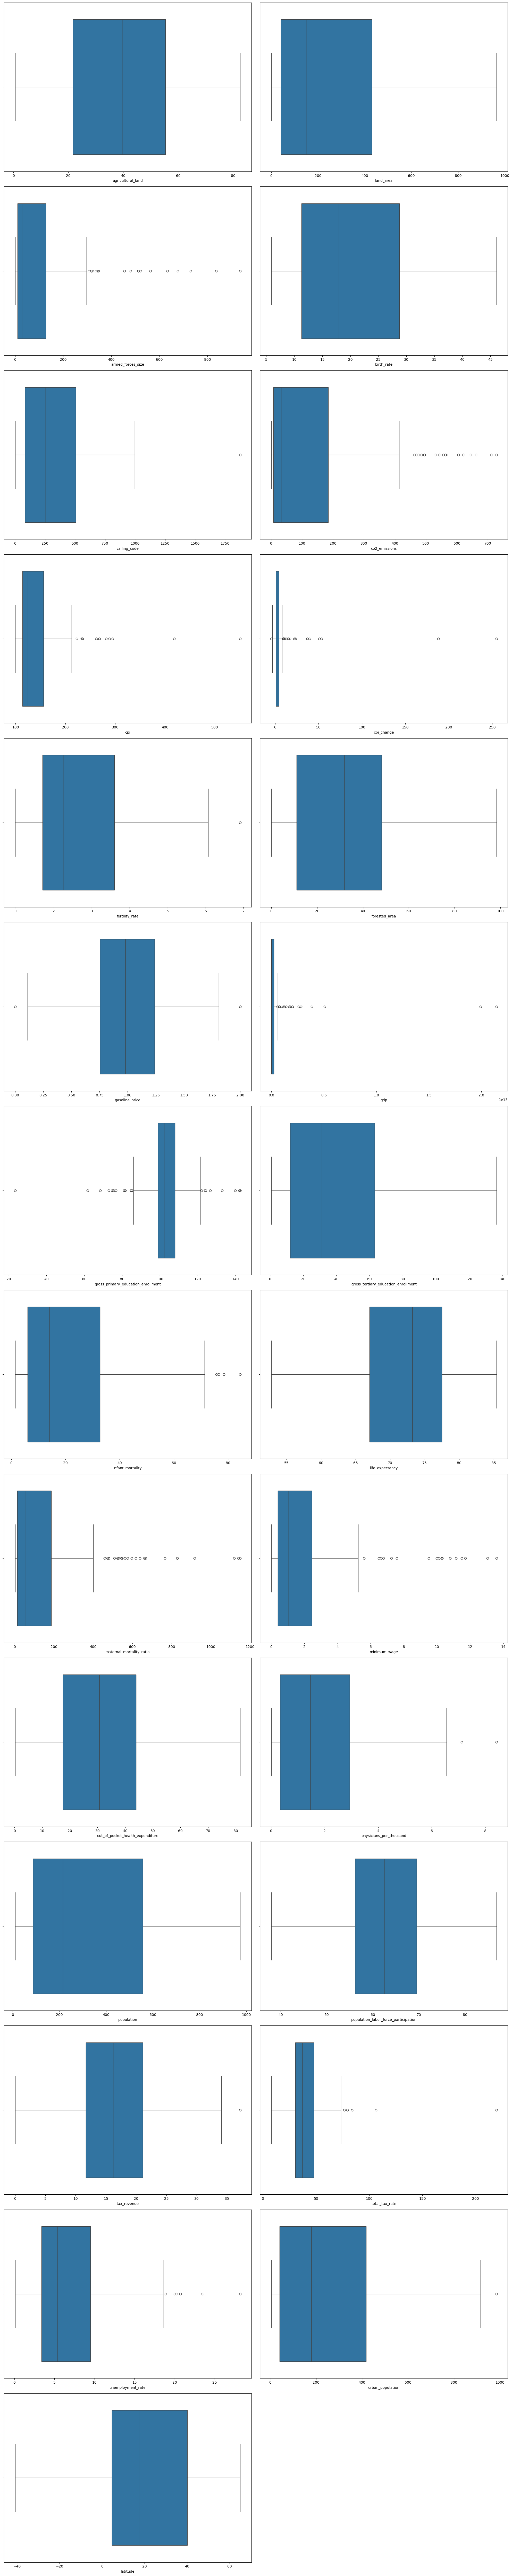

In [101]:
# Tenemos 28 valores. Los visualizamos

fig, axes = plt.subplots(nrows = 14, ncols = 2, figsize = (20,100)) 

axes = axes.flat

for indice, col in enumerate(columnas_numericas_nulos):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1])

Interpretación de los resultados:

Evaluaremos con métodos de imputación complejos las columnas con proporción de nulos superior a 10% o que presenten valores atípicos. El resto, las imputaremos con métodos simples y la media o la mediana.

In [102]:
columnas_para_imputacion_compleja = [
                                        'urban_population', 
                                        'population', 
                                        'armed_forces_size', 
                                        'co2_emissions', 'cpi', 
                                        'cpi_change', 
                                        'gdp', 'gross_primary_education_enrollment', 
                                        'infant_mortality', 
                                        'maternal_mortality_ratio', 
                                        'minimum_wage', 
                                        'total_tax_rate', 'unemployment_rate', 
                                        'calling_code', 
                                        'fertility_rate', 
                                        'gasoline_price', 
                                        'physicians_per_thousand', 
                                        'tax_revenue'
                                    ]

columnas_para_imputacion_simple = [     
                                        'agricultural_land',
                                        'land_area',
                                        'birth_rate',
                                        'forested_area',
                                        'gross_tertiary_education_enrollment',
                                        'life_expectancy',
                                        'out_of_pocket_health_expenditure',
                                        'population_labor_force_participation',
                                        'latitude',
                                        'longitude'
                            ]

In [103]:
# Evaluamos si elegir media o mediana en las de imputación simples.

df[columnas_para_imputacion_simple].describe()

,agricultural_land,land_area,birth_rate,forested_area,gross_tertiary_education_enrollment,life_expectancy,out_of_pocket_health_expenditure,population_labor_force_participation,latitude,longitude
count,188.000000,165.000000,189.000000,188.000000,183.000000,187.000000,188.000000,176.000000,194.000000,194.000000
mean,39.117553,255.212661,20.214974,32.015426,37.963388,72.279679,32.637234,62.738068,19.092351,20.232434
std,21.783052,258.385008,9.945774,23.791331,29.261022,7.483661,19.172697,10.502907,23.961779,66.716110
min,0.600000,0.000000,5.900000,0.000000,0.800000,52.800000,0.200000,38.000000,-40.900557,-175.198242
25%,21.700000,41.277000,11.300000,11.000000,12.150000,67.000000,17.450000,56.150000,4.544175,-7.941496
50%,39.600000,148.460000,17.950000,32.000000,31.200000,73.200000,30.700000,62.450000,17.273849,20.972652
75%,55.375000,430.000000,28.750000,48.175000,63.150000,77.500000,43.975000,69.500000,40.124603,48.281523
max,82.600000,964.000000,46.080000,98.300000,136.600000,85.400000,81.600000,86.800000,64.963051,178.065032


In [104]:
imputacion_con_mediana = ['land_area', 'forested_area', 'birth_rate', 'gross_tertiary_education_enrollment', 'latitude' ]

imputacion_con_media = ['agricultural_land', 'forested_area', 'life_expectancy', 'out_of_pocket_health_expenditure', 'population_labor_force_participation', 'longitude']

In [105]:
df_otra_copia = df.copy()

In [106]:
df_otra_copia2 = df_otra_copia.copy() # Nueva copia de seguridad 

In [107]:
print(f"Quedan {(df[columnas_numericas_nulos].isnull().sum()).sum()} nulos por eliminar")

Quedan 647 nulos por eliminar


In [108]:
df[imputacion_con_media].isnull().sum().sum()

49

In [109]:
df[imputacion_con_mediana].isnull().sum().sum()

56

In [110]:
(df[columnas_numericas_nulos].isnull().sum()).sum() #647 nulos
(df[imputacion_con_mediana].isnull().sum()).sum() # 56 nulos
(df[imputacion_con_media].isnull().sum()).sum()  #49 

# Tenemos 105 nulos para eliminar con imputación sencilla.

49

In [111]:
# Imputamos con media y mediana:

for col in imputacion_con_mediana:
    df[col] = df[col].fillna(df[col].median())


for col in imputacion_con_media:
    df[col] = df[col].fillna(df[col].mean())

# Comprobamos si hemos eliminado los nulos.

(df[imputacion_con_mediana].isnull().sum()).sum() #  0 nulos
(df[imputacion_con_media].isnull().sum()).sum() #  0 nulos


0

Terminamos con la imputación compleja.

In [112]:
columnas_para_imputacion_compleja

['urban_population',
 'population',
 'armed_forces_size',
 'co2_emissions',
 'cpi',
 'cpi_change',
 'gdp',
 'gross_primary_education_enrollment',
 'infant_mortality',
 'maternal_mortality_ratio',
 'minimum_wage',
 'total_tax_rate',
 'unemployment_rate',
 'calling_code',
 'fertility_rate',
 'gasoline_price',
 'physicians_per_thousand',
 'tax_revenue']

In [113]:
columnas_para_imputacion_compleja

# Empezamos por el IterativeImputer

imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

imputer_iterative_imputado = imputer_iterative.fit_transform(df[columnas_para_imputacion_compleja])

imputer_iterative_imputado

array([[6.24644735e+02, 5.08456393e+02, 3.23000000e+02, ...,
        7.00000000e-01, 2.80000000e-01, 9.30000000e+00],
       [3.37598654e+02, 4.53566186e+02, 9.00000000e+00, ...,
        1.36000000e+00, 1.20000000e+00, 1.86000000e+01],
       [1.79331230e+03, 1.74782367e+02, 3.17000000e+02, ...,
        2.80000000e-01, 1.72000000e+00, 3.72000000e+01],
       ...,
       [4.64190733e+02, 4.79735369e+02, 4.00000000e+01, ...,
        9.20000000e-01, 3.10000000e-01, 1.48164278e+01],
       [5.61796880e+02, 5.91119395e+02, 1.60000000e+01, ...,
        1.40000000e+00, 1.19000000e+00, 1.62000000e+01],
       [6.71177457e+02, 7.52888842e+02, 5.10000000e+01, ...,
        1.34000000e+00, 2.10000000e-01, 2.07000000e+01]])

In [116]:

df_copia_pre_complejos = df.copy()


Aquí habría que comparar las dos imputaciones complejas y elegir la que menos se aleje de la estadística original.